In [86]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [88]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [90]:
num_var = df.dtypes[df.dtypes !='O'].index


In [91]:
num_var

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

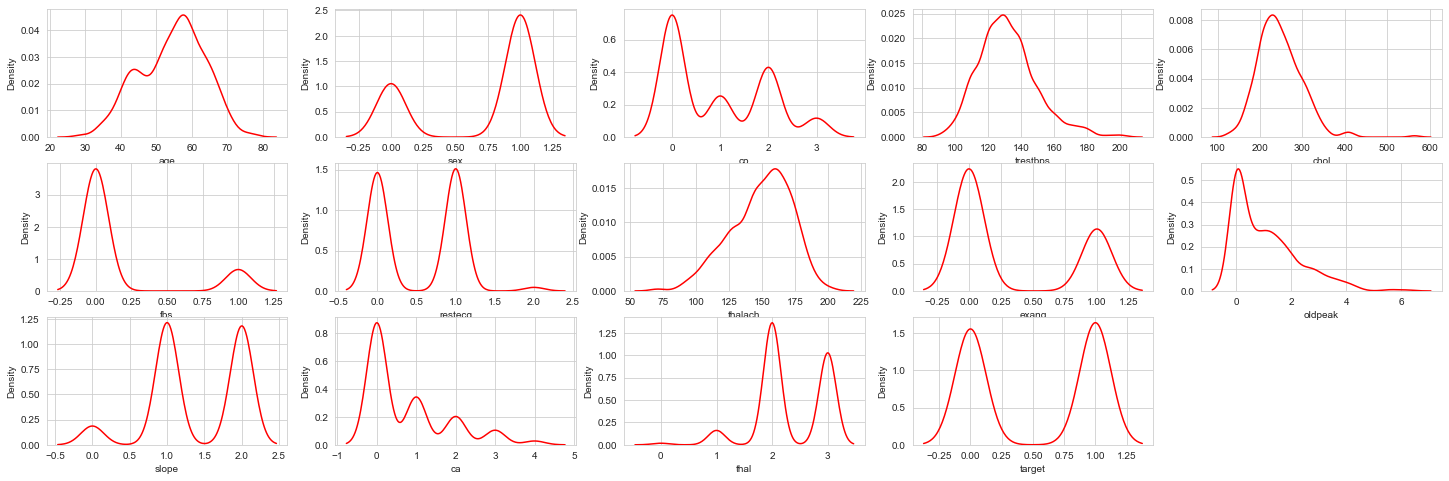

In [92]:
plt.figure(figsize=(25,25))
for i , var in enumerate(num_var):
    plt.subplot(9,5,i+1)
    sn.distplot(df[var],bins=20,color='red',hist=False)


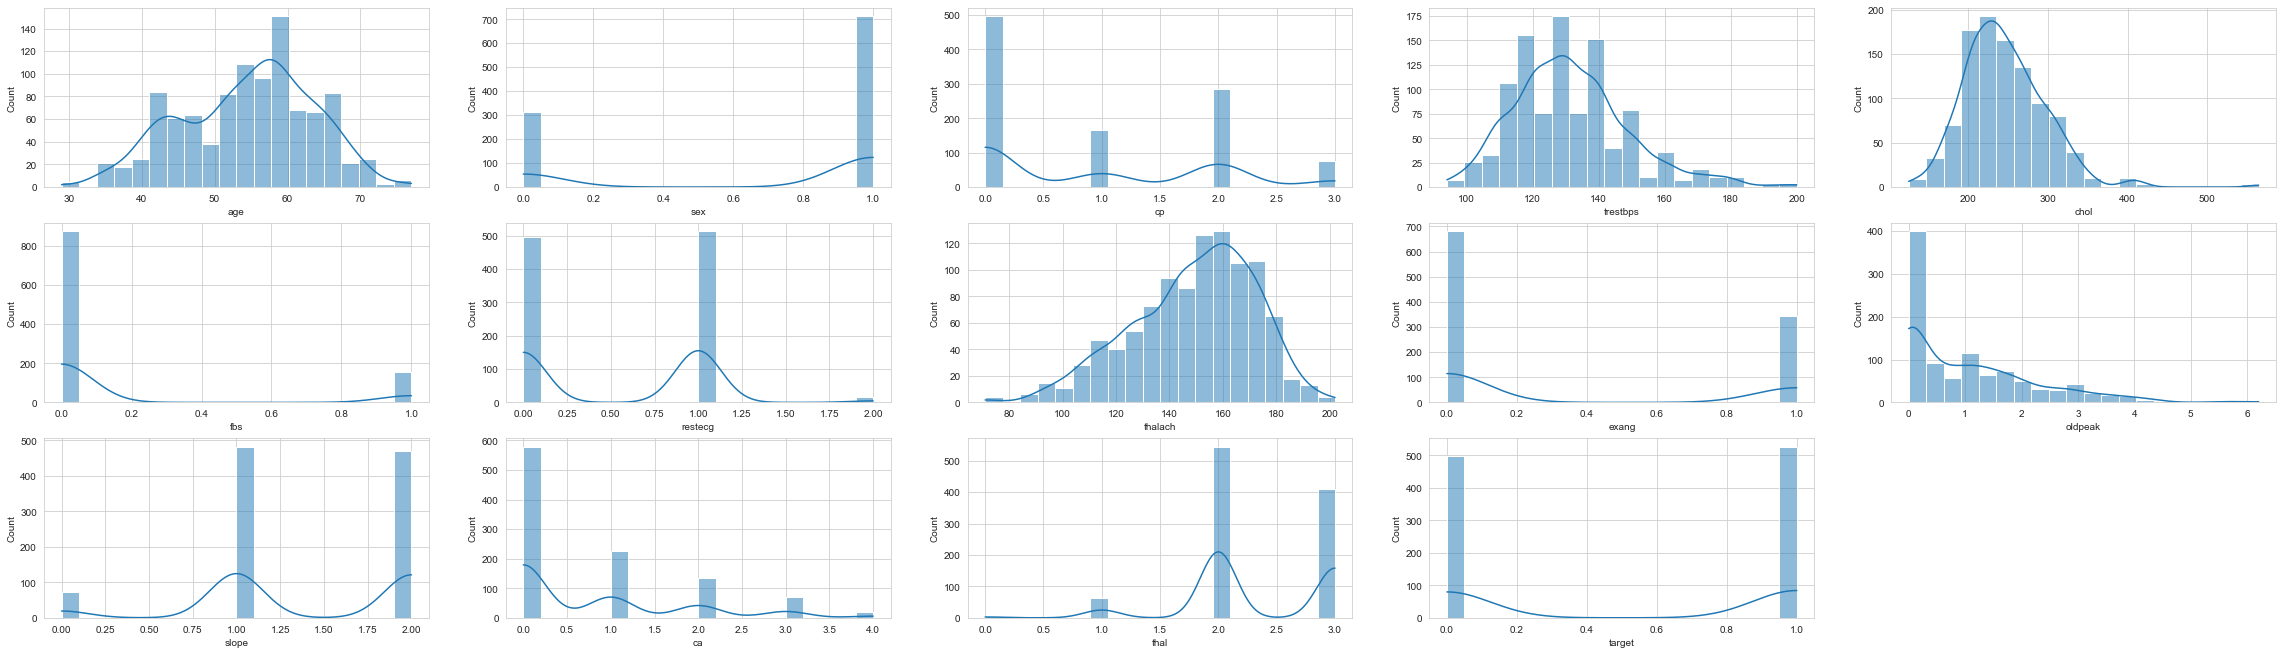

In [93]:
plt.figure(figsize=(40,35))
for i , var in enumerate(num_var):
    plt.subplot(9,5,i+1)
    sn.histplot(df[var],bins=20,kde=True)



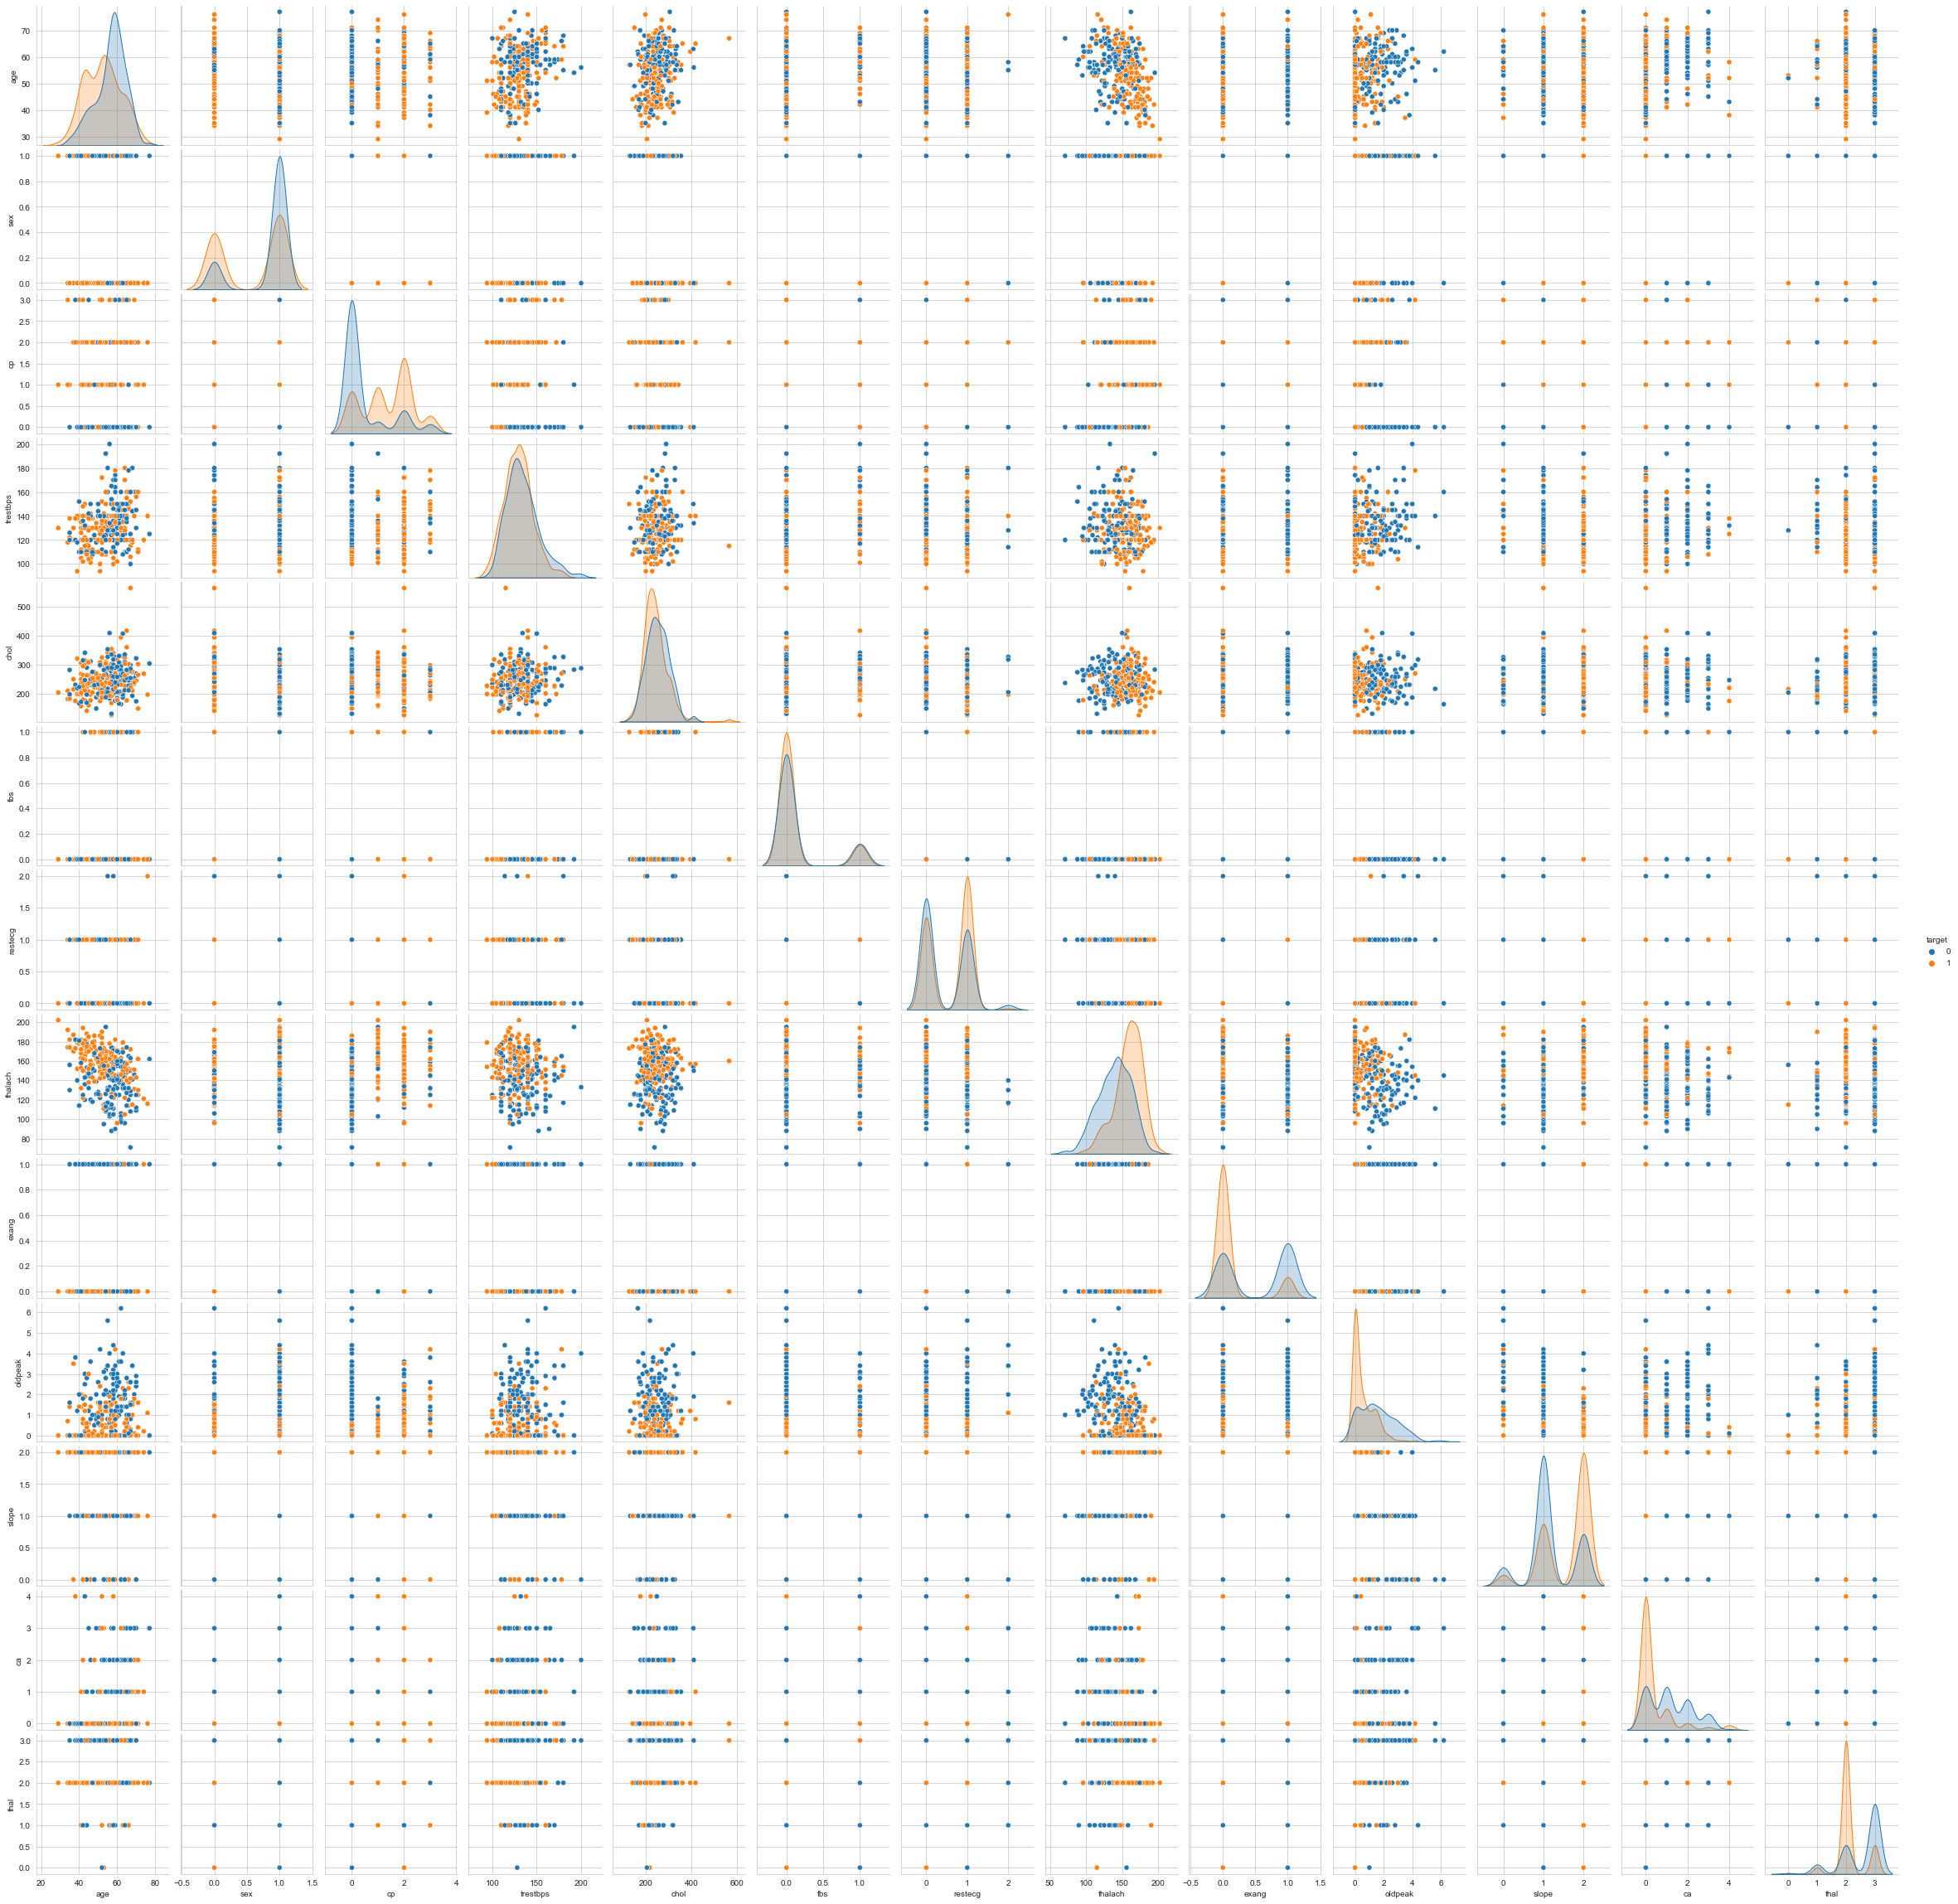

In [94]:
sn.pairplot(df,hue='target')

In [95]:
#checking for imbalance dataset
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [96]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



# feature selection

<AxesSubplot:>

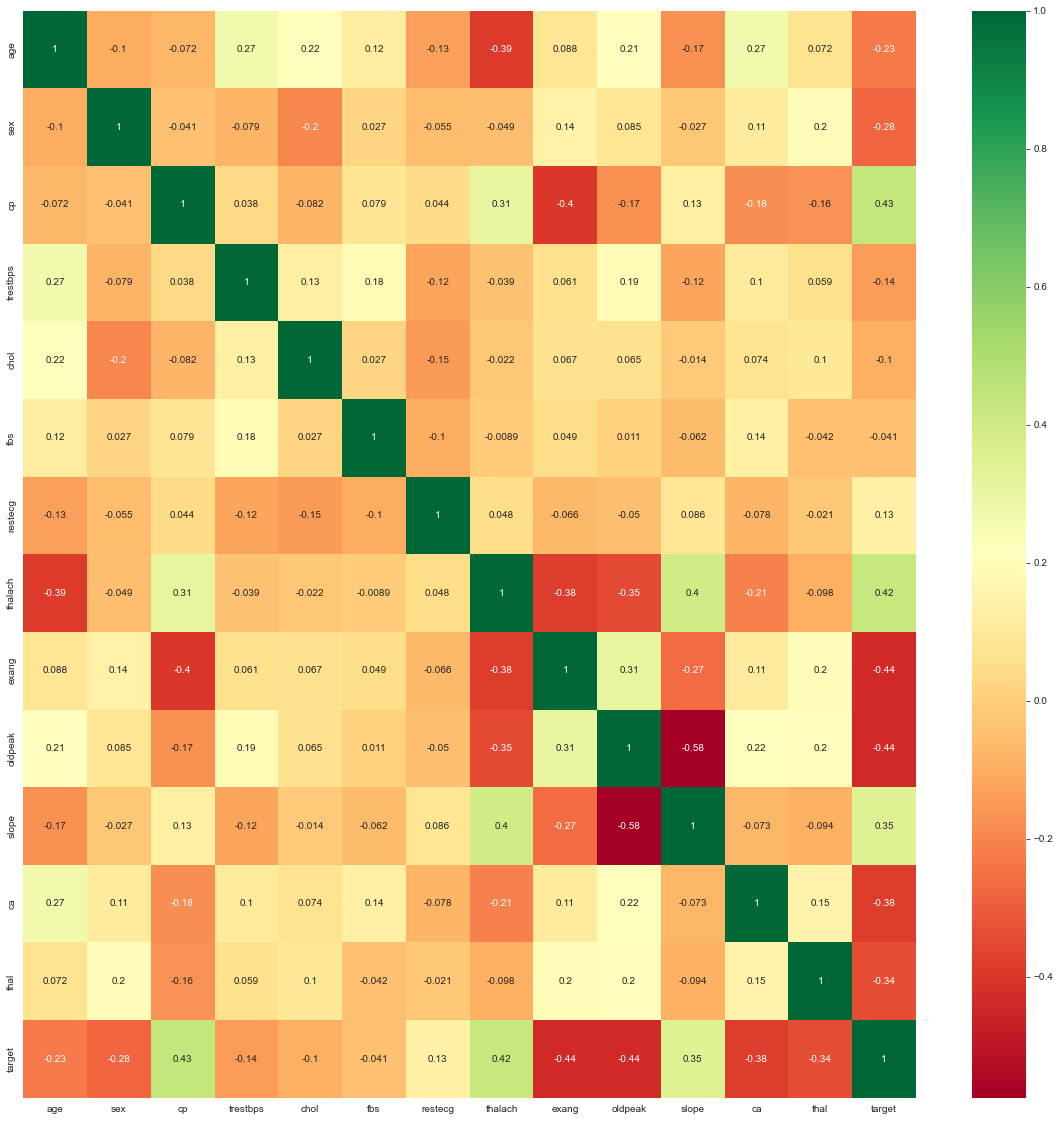

In [97]:
import seaborn as sn
corrmat = df.corr()
names = corrmat.index
plt.figure(figsize=(20,20))
sn.heatmap(df[names].corr(),annot=True,cmap='RdYlGn')

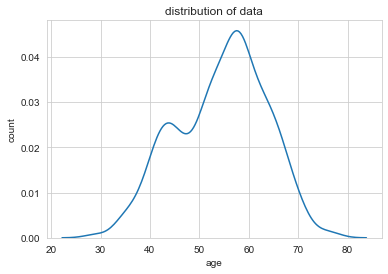

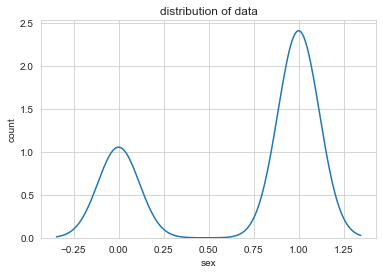

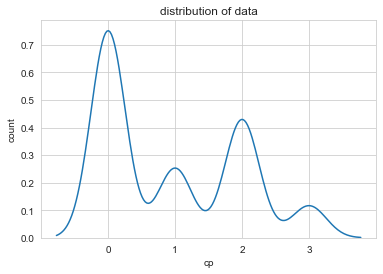

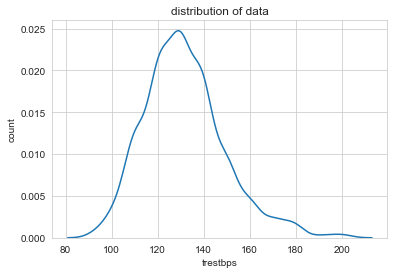

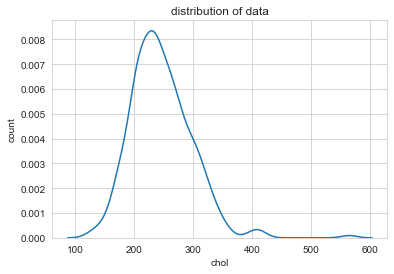

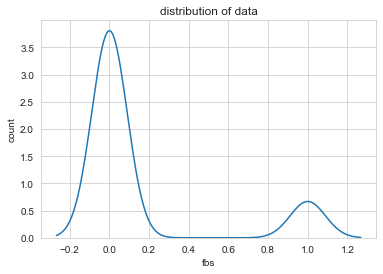

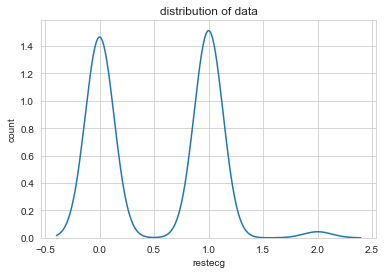

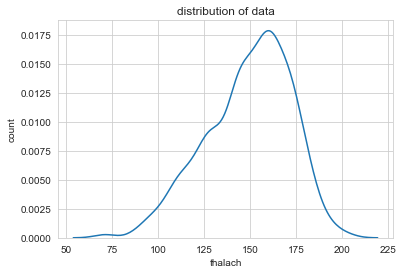

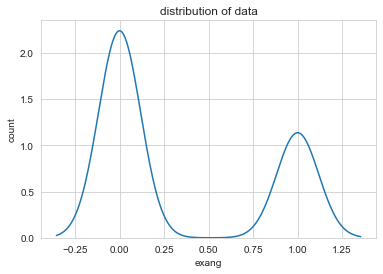

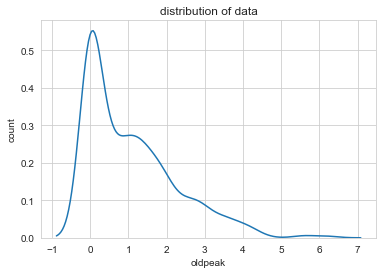

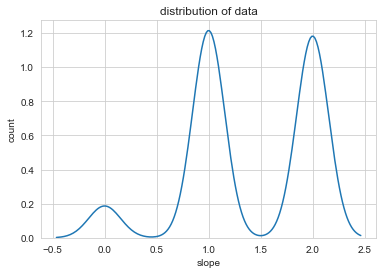

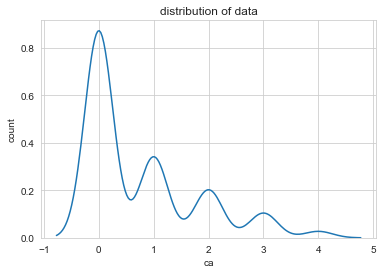

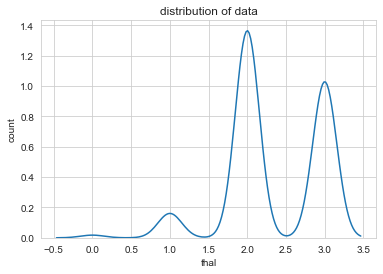

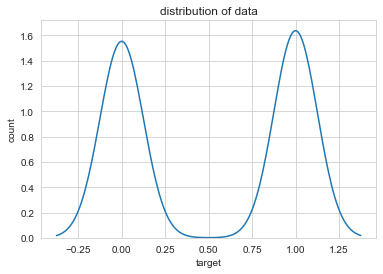

In [98]:
for i in df:
    sn.kdeplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title('distribution of data')
    plt.show()

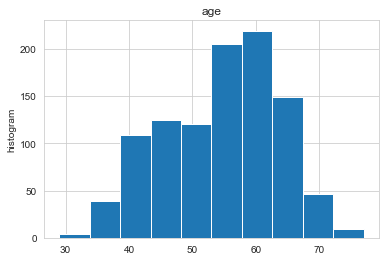

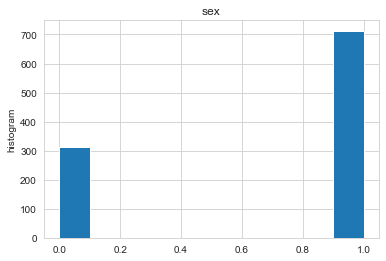

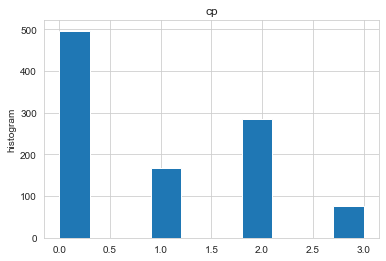

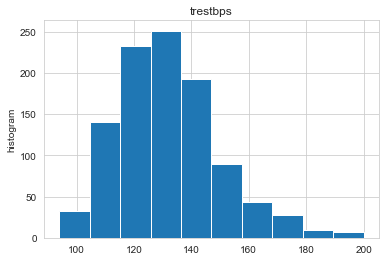

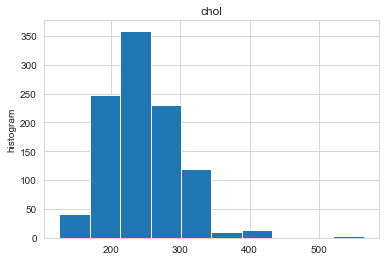

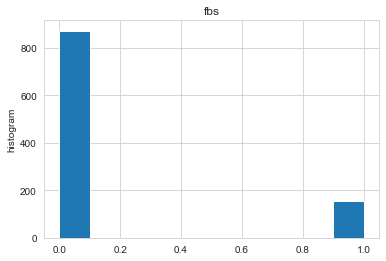

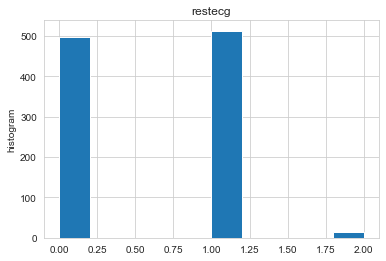

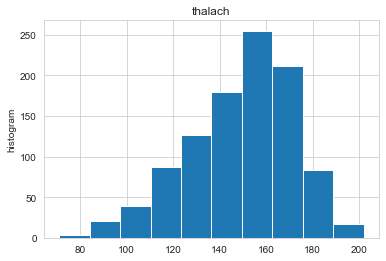

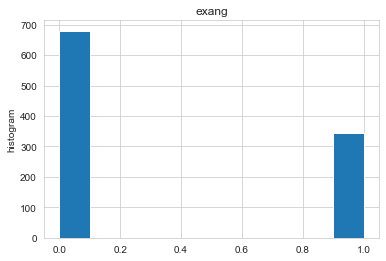

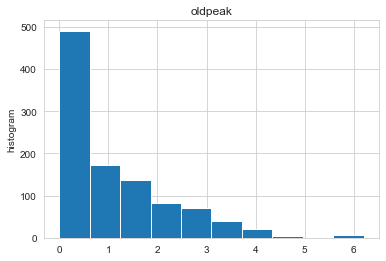

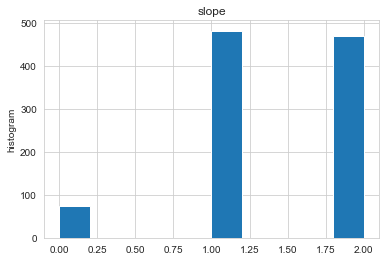

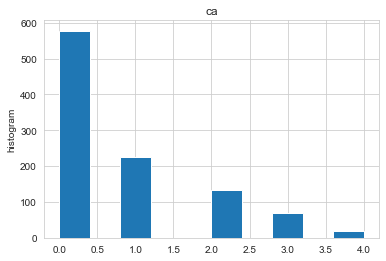

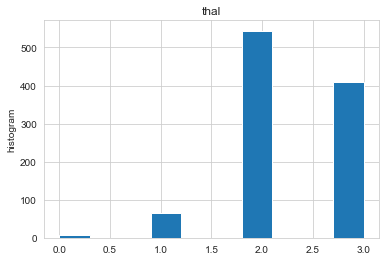

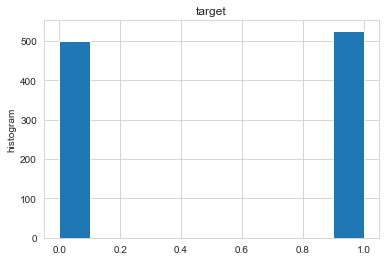

In [99]:
for i in df.columns:
    df[[i]].hist()
    plt.ylabel('histogram')


<Figure size 1440x1440 with 0 Axes>

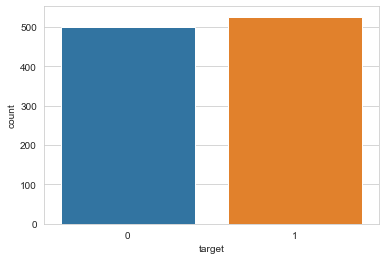

<Figure size 1440x1440 with 0 Axes>

In [100]:
sn.set_style('whitegrid')
sn.countplot(x='target',data=df)
plt.figure(figsize=(20,20))

In [101]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [102]:
#commands to execute for plotly
!pip install cufflinks
!pip install plotly
import plotly as py
import plotly.express as px
from plotly.offline import iplot
import plotly.tools as tl
import cufflinks as cf

In [103]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import seaborn as sn



In [104]:
df.iplot(kind='hist',subplots=True)
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [105]:
df.iplot(kind='box')

In [106]:
X =df.drop('target',axis=1)
y=df['target']

In [107]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [108]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [111]:
y_train.value_counts()

1    358
0    328
Name: target, dtype: int64

In [112]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,46,1,0,140,311,0,1,120,1,1.8,1,2,3
728,46,1,0,140,311,0,1,120,1,1.8,1,2,3
478,39,1,2,140,321,0,0,182,0,0.0,2,0,2
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3


In [113]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred,y_test)
print(confusion)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

[[171   9]
 [  0 159]]
0.9734513274336283


In [116]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       180
           1       0.95      1.00      0.97       159

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



Text(70.0, 0.5, 'Actual')

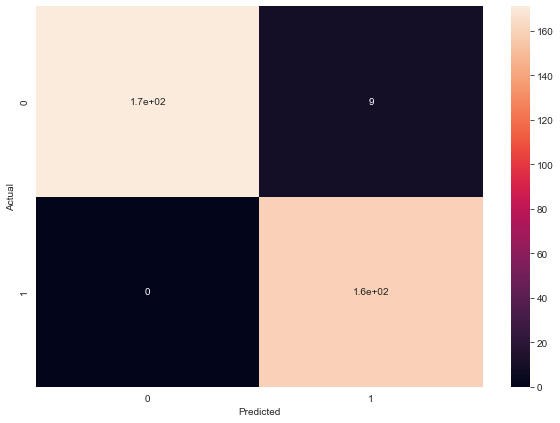

In [117]:
plt.figure(figsize=(10,7))
sn.heatmap(confusion,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

[Text(0.5514705882352942, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.2710084033613445, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.1722689075630252, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.499\nsamples = 148\nvalue = [71, 77]'),
 Text(0.07563025210084033, 0.6818181818181818, 'X[7] <= 119.5\ngini = 0.344\nsamples = 86\nvalue = [19, 67]'),
 Text(0.058823529411764705, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.09243697478991597, 0.5909090909090909, 'X[8] <= 0.5\ngini = 0.286\nsamples = 81\nvalue = [14, 67]'),
 Text(0.03361344537815126, 0.5, 'X[4] <= 316.0\ngini = 0.073\nsamples = 53\nvalue = [2, 51]'),
 Text(0.01680672268907563, 0.4090909090909091, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.05042016806722689, 0.4090909090909091, 'X[3] <= 135.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03361344537815126, 0.3181818181818182, 'gini = 0.0\n

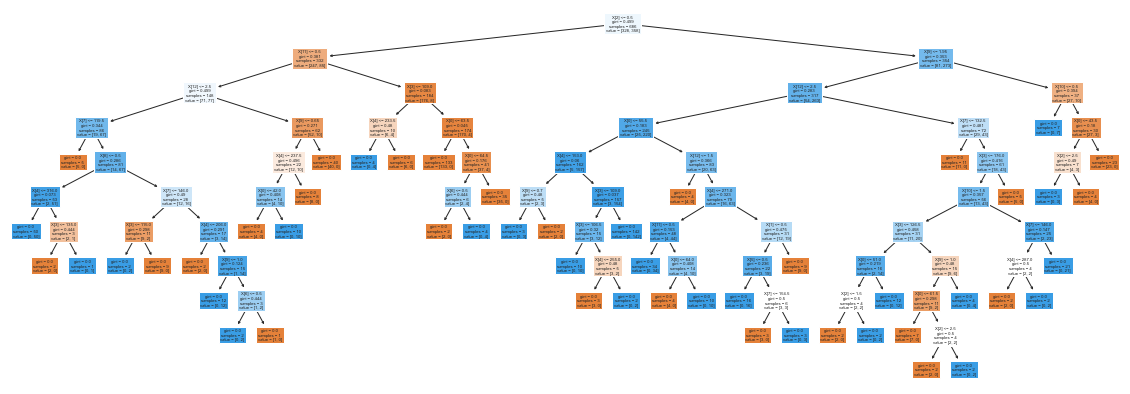

In [118]:
from sklearn import tree
plt.figure(figsize=(20,7))
tree.plot_tree(model,filled=True)

# Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
ran_model = RandomForestClassifier()
ran_model.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
y_pred = ran_model.predict(X_test)

In [121]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [122]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred,y_test)
print(confusion)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

[[171   6]
 [  0 162]]
0.9823008849557522


In [123]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       177
           1       0.96      1.00      0.98       162

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



Text(70.0, 0.5, 'Actual')

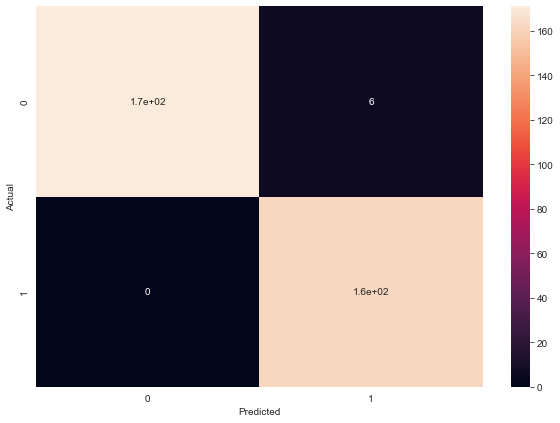

In [124]:
plt.figure(figsize=(10,7))
sn.heatmap(confusion,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [126]:
import pickle
with open('Random_forest','wb') as f:
    pickle.dump(model,f)

In [128]:
with open('Random_forest','rb') as f:
    ob= pickle.load(f)

In [156]:
ob.predict([X_test.values[2]])

array([0], dtype=int64)

In [158]:
y_test.values[2]

0

In [159]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [169]:
X_test.values[34]

array([ 42.,   1.,   0., 140., 226.,   0.,   1., 178.,   0.,   0.,   2.,
         0.,   2.])